# **Feedforward Neural Network (FNN)**

**1. Load libraries**

In [ ]:
#Oscar Daniel Leal Maldonado 2017986
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt


**2. Load Data**

In [ ]:
number_mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = number_mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


**3.Data Preprocessing**

In [ ]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five',
               'Six', 'Seven', 'Eight', 'Nine']

train_images = train_images / 255.0

test_images = test_images / 255.0


**4. Model selection and training.**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=8, batch_size=32, validation_split=0.1)

Epoch 1/8
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2752 - accuracy: 0.9214 - val_loss: 0.1259 - val_accuracy: 0.9647
Epoch 2/8
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1220 - accuracy: 0.9637 - val_loss: 0.0991 - val_accuracy: 0.9715
Epoch 3/8
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0830 - accuracy: 0.9749 - val_loss: 0.0787 - val_accuracy: 0.9783
Epoch 4/8
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0608 - accuracy: 0.9810 - val_loss: 0.0817 - val_accuracy: 0.9742
Epoch 5/8
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.0766 - val_accuracy: 0.9785
Epoch 6/8
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0701 - val_accuracy: 0.9793
Epoch 7/8
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0776 - val_accuracy: 0.9783

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0729 - accuracy: 0.9784 - 675ms/epoch - 2ms/step

Test accuracy: 0.9783999919891357


**5. Model testing.**

In [ ]:

num_predictions = 6
predictions = model.predict(test_images[:num_predictions])
predicted_labels = np.argmax(predictions, axis=1)

# Display predictions and actual labels
for i in range(num_predictions):
    print(f"Predicted: {predicted_labels[i]}, Actual: {test_labels[i]}")


1/1 [==============================] - 0s 368ms/step
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4
Predicted: 1, Actual: 1


**Plot**

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

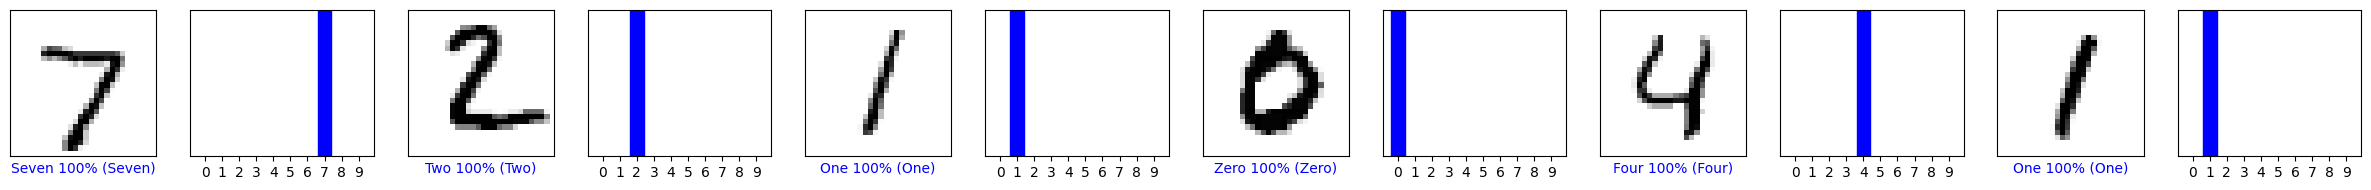

In [ ]:
num_rows = 1
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()